In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Raw_Housing_Data = pd.read_csv("/content/drive/MyDrive/House Sale Price Data Set/M4T2V1_helper_text.zip")

In [ ]:
Raw_Housing_Data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [ ]:
Raw_Housing_Data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

#**Univariate Analysis - Target Variable**
Questions to answer:
1.  What information does this variable represent?
2.  What is the data type for this variable?
3. Do the Few sample values that we can eyeball('skim through')?
4. What are min,max,mean,median values?what we can infer?
5. Does the target variable contain any outliers that need to treat?
6. Any missing values to treat?
7. Distribution of the values in targer variable over its range? Are the values uniformaly or normaly distributed or is data skwed towards lower or higher values?
8. How is the variable correlated with the target variable?
9. how is this variable correlated with other independent numerical variables?

















In [ ]:
Raw_Housing_Data['Sale Price'].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale Price, dtype: float64

In [ ]:
Raw_Housing_Data['Sale Price'].tail()

21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: Sale Price, dtype: float64

In [ ]:
Raw_Housing_Data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

###### Visual representation of sale price variable in data set

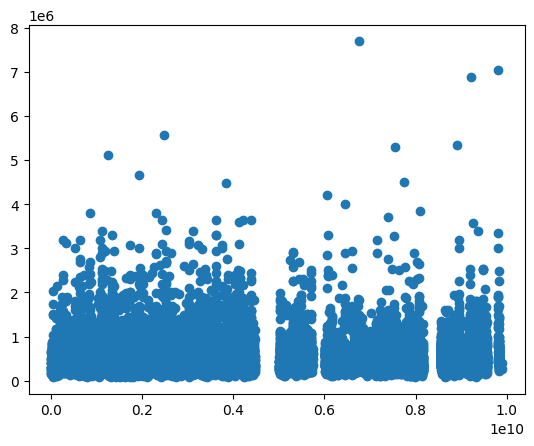

In [ ]:
plt.scatter(x= Raw_Housing_Data['ID'], y = Raw_Housing_Data['Sale Price'])

## Creating a Box and Whisker plot in python to identify outliers
#### The matplotlib library doesn't have the capability to ignore the missing values for the  variable and since sale price have 21613 - 21609 = 4 missing values so will use Seaborn library

<Axes: xlabel='Sale Price'>

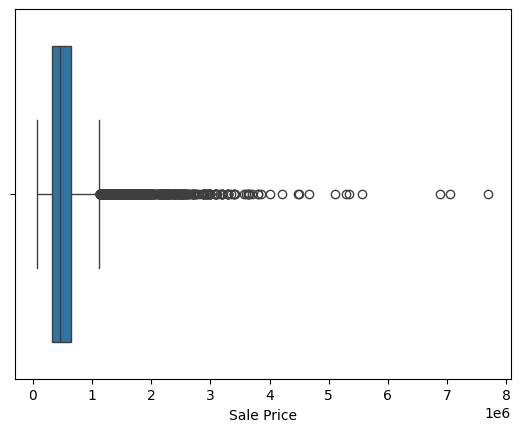

In [ ]:
sns.boxplot(x=Raw_Housing_Data['Sale Price'])

# Treating outliers by imputing method : By limit values

In [ ]:
q1 = Raw_Housing_Data["Sale Price"].quantile(0.25)
q3 = Raw_Housing_Data["Sale Price"].quantile(0.75)

In [ ]:
iqr = q3 -q1

In [ ]:
iqr

323050.0

In [ ]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [ ]:
def limit_imputer(value):
  if value> upper_limit:
    return upper_limit
  if value < lower_limit:
    return lower_limit
  else:
    return value

In [ ]:
Raw_Housing_Data['Sale Price'] = Raw_Housing_Data['Sale Price'].apply(limit_imputer)

To validate if we have actually treated the outlier in the Sale Price:

In [ ]:
Raw_Housing_Data["Sale Price"].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

### Treating missing values :using 'Deletion method' as it is better to use deletion instead of imputing for target variable as our predictive model learns from it

In [ ]:
Raw_Housing_Data.dropna(inplace = True, axis = 0,subset=['Sale Price'])

In [ ]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

## How the values are distributed over the range ? plotting Histogram

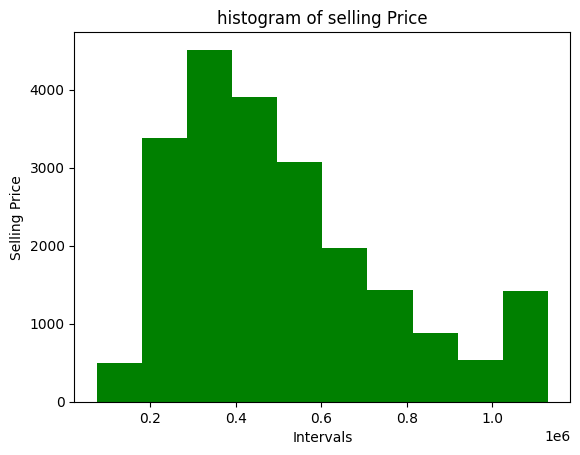

In [ ]:
plt.hist(Raw_Housing_Data['Sale Price'],bins = 10, color = 'green')
plt.xlabel("Intervals")
plt.ylabel('Selling Price')
plt.title("histogram of selling Price")
plt.show()

# Data exploration - Independent Numerical Variables

In [ ]:
len(Raw_Housing_Data['Latitude'].unique())

5034

In [ ]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
numerical_columns = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',"Area of the House from Basement (in Sqft)",'Latitude','Longitude',"Living Area after Renovation (in Sqft)"]

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
Raw_Housing_Data[numerical_columns]= imputer.fit_transform(Raw_Housing_Data[numerical_columns])

In [ ]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [ ]:
Raw_Housing_Data['Zipcode'].shape # single dimention array

(21609,)

In [ ]:
column = Raw_Housing_Data["Zipcode"].values.reshape(-1,1)
column.shape

(21609, 1)

### Zipcode should be treated as a categorical type

In [ ]:
column = Raw_Housing_Data['Zipcode'].values.reshape(-1,1)
impute = SimpleImputer(missing_values = np.nan, strategy ='most_frequent')
Raw_Housing_Data['Zipcode'] = imputer.fit_transform(column)

In [ ]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

# Variable Transformation;
###Applications : a) Outlier treatment
###               b) When variable does not represent the info it contains in the best possible way
###                c) To derive a  new variable from an existing variable
=> variable transformation of 'Zipcode' : It would make sense to convert 'Zipcode' variable data type into a categorical variable , where 1)Sale Price' in each Zipcode can be analyzed  2) Variation across zipcode can be seen

In [ ]:
Raw_Housing_Data['Zipcode']= Raw_Housing_Data['Zipcode'].astype(object)


In [ ]:
Raw_Housing_Data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [ ]:
Raw_Housing_Data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [ ]:
mapping = {'None': '0',
           'Once' : '1',
           'Twice' : '2',
           'Thrice': '3',
           'Four': '4'}
Raw_Housing_Data['No of Times Visited']= Raw_Housing_Data['No of Times Visited'].map(mapping)

In [ ]:
Raw_Housing_Data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

### The two variables to be derived from 'Renovated Year':
### 1) Ever Renovated : 'Yes' for non-zero and 'No' for renovated year 0
### 2) Years Since Rennovation

In [ ]:
Raw_Housing_Data['Ever Renovated']= np.where(Raw_Housing_Data['Renovated Year']==0,'No','Yes')

In [ ]:
Raw_Housing_Data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


Years Since renovation = Year of Sale - Year of Renovation

In [ ]:
Raw_Housing_Data['Purchase Year']= pd.DatetimeIndex(Raw_Housing_Data['Date House was Sold']).year

In [ ]:
Raw_Housing_Data['Years Since Renovation']= np.where(Raw_Housing_Data['Ever Renovated']=='Yes', abs(Raw_Housing_Data['Purchase Year']- Raw_Housing_Data['Renovated Year']),0)

In [ ]:
Raw_Housing_Data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


####To keep Dataset tidy we can drop the other three variables since we would not need them going forward

In [ ]:
Raw_Housing_Data.drop(columns = ['Purchase Year','Date House was Sold', 'Renovated Year'],inplace= True,axis = 1)

In [ ]:
Raw_Housing_Data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [ ]:
Transformed_Housing_Data= Raw_Housing_Data

In [ ]:
Transformed_Housing_Data

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530.0,1131.0,3.0,No,0,Fair,...,1530.0,0,9,98103.0,47.6993,-122.346,1530.0,1509,No,0
21609,6600060120,400000.0,4,2.50,2310.0,5813.0,2.0,No,0,Fair,...,2310.0,0,4,98146.0,47.5107,-122.362,1830.0,7200,No,0
21610,1523300141,402101.0,2,0.75,1020.0,1350.0,2.0,No,0,Fair,...,1020.0,0,9,98144.0,47.5944,-122.299,1020.0,2007,No,0
21611,291310100,400000.0,3,2.50,1600.0,2388.0,2.0,No,0,Fair,...,1600.0,0,14,98027.0,47.5345,-122.069,1410.0,1287,No,0


# Bivariate Analysis

In [ ]:
Transformed_Housing_Data['Sale Price'].corr(Transformed_Housing_Data['Flat Area (in Sqft)'])

0.6951704258420669

In [ ]:
import numpy as np
np.corrcoef(Transformed_Housing_Data['Sale Price'],Transformed_Housing_Data['Flat Area (in Sqft)'])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [ ]:
Transformed_Housing_Data.drop(columns=['ID']).corr()

<ipython-input-45-640a8784d5ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Transformed_Housing_Data.drop(columns=['ID']).corr()


,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.680914,0.606527,0.307513,-0.064306,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.349223,0.477549,0.303294,-0.154113,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.635638,0.685088,0.283798,-0.505954,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.705725,0.876226,0.435142,-0.318146,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.102314,0.183492,0.015252,-0.053119,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.461368,0.524031,-0.245572,-0.489244,0.049692,0.125620,0.280106,-0.011204,-0.000901
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,1.000000,0.705153,0.145232,-0.456711,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.705153,1.000000,-0.051825,-0.423848,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.145232,-0.051825,1.000000,0.133072,0.110451,-0.144822,0.200302,0.017263,0.029158
Age of House (in Years),-0.064306,-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,-0.456711,-0.423848,0.133072,1.000000,0.148083,-0.409515,-0.326307,-0.071016,0.203375


# Data Exploration- Categorical Variables
These are : a) Waterfront view
            b) Condition of the House
            c) Zipcode
            d) Ever Renovated

In [ ]:
Transformed_Housing_Data.drop( columns= 'ID', inplace= True) # since it is just an identifier

The Questions I need to Answer
1) What information does this variable contain?
2) Do the few saample values that we are able to 'eyeball' (i.e skim through) make sense?
3) How many and what unique values i.e levels, does this categorical variable have and what is the frequency distribution of those unique values?
4) How is dependent/target variable correlated with this variable


In [ ]:
Transformed_Housing_Data['Condition of the House'].head(10)

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
5         Fair
6         Fair
7         Fair
8         Fair
9         Fair
Name: Condition of the House, dtype: object

In [ ]:
Transformed_Housing_Data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<Axes: xlabel='Condition of the House'>

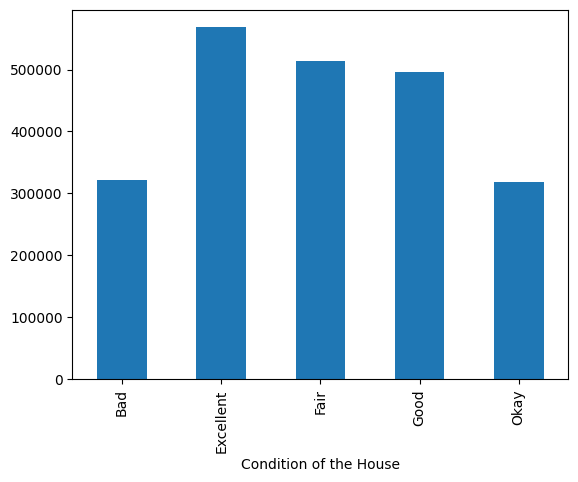

In [ ]:
#  Visual Relationship with Dependent Variable
Transformed_Housing_Data.groupby('Condition of the House')['Sale Price'].mean().plot(kind='bar')

<Axes: xlabel='Condition of the House'>

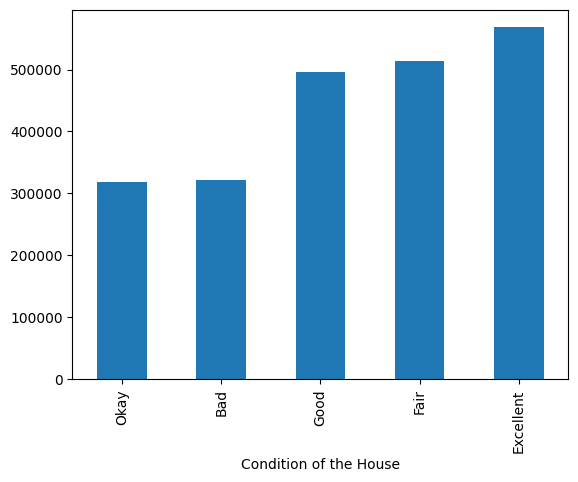

In [ ]:
Transformed_Housing_Data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Waterfront View'>

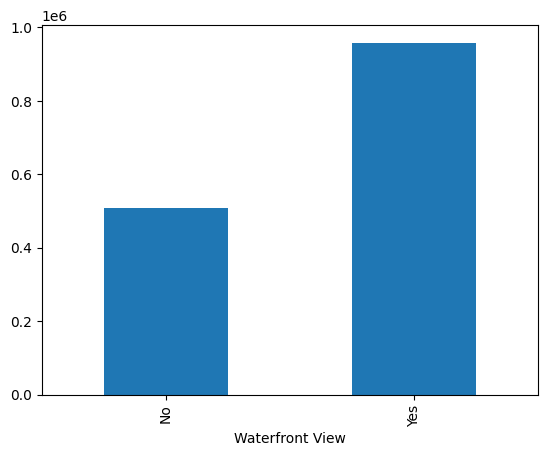

In [ ]:
# Similarly With other variables
Transformed_Housing_Data.groupby('Waterfront View')['Sale Price'].mean().plot(kind='bar')

<Axes: xlabel='Ever Renovated'>

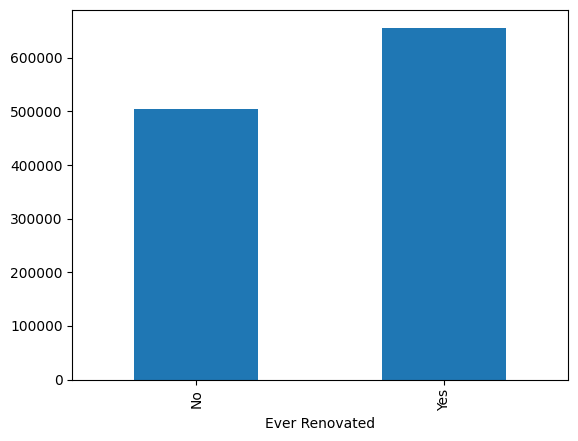

In [ ]:
Transformed_Housing_Data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Zipcode'>

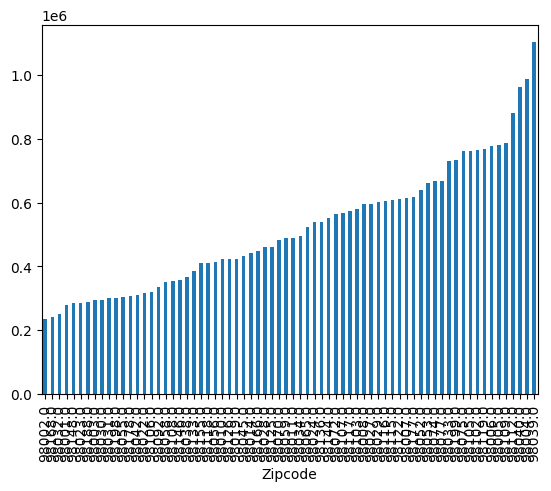

In [ ]:
Transformed_Housing_Data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind='bar')

# **ANOVA** : ( Relationship between Categorical and numerical mathematically or statistically)
The method of finding out whether a categorical variable is having an impact on the numerical variable and can not quantify the relationship.

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
# In Python, variable names should not have spaces in between
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns={'Sale Price':'Sale_Price'})

In [ ]:
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns= {'Condition of the House':'Condition_of_the_House'})

In [ ]:
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns={'Ever Renovated':'Ever_Renovated'})

In [ ]:
Transformed_Housing_Data = Transformed_Housing_Data.rename(columns={'Waterfront View': 'Waterfront_view'})

In [ ]:
Transformed_Housing_Data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [ ]:
Transformed_Housing_Data['Waterfront_view'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
mod = ols('Sale_Price ~ Condition_of_the_House', data= Transformed_Housing_Data).fit()

In [ ]:
Anova_Table = sm.stats.anova_lm(mod,typ= 2)

In [ ]:
print(Anova_Table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [ ]:
mod = ols('Sale_Price~ Waterfront_view', data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Waterfront_view,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [ ]:
mod = ols('Sale_Price ~ Ever_Renovated', data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [ ]:
mod = ols('Sale_Price ~ Zipcode', data = Transformed_Housing_Data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Zipcode,6.859560e+14,69.0,321.892829,0.0
Residual,6.652141e+14,21539.0,NaN,NaN


# **Dummy Variables** :
The process of transforming a categorical variable into a set of numerical or boolean variable
Regression modeling requires all the independent variables to be numerical variables.

In [ ]:
Transformed_Housing_Data = pd.get_dummies(Transformed_Housing_Data,
                                         columns = ['Condition_of_the_House'],
                                         drop_first = True)

In [ ]:
Transformed_Housing_Data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_view,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,1180.0,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,2170.0,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,770.0,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,1050.0,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,1680.0,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0


In [ ]:
Transformed_Housing_Data = pd.get_dummies(Transformed_Housing_Data,
                                         columns = ['Ever_Renovated','Waterfront_view'],
                                         drop_first = True)

In [ ]:
Transformed_Housing_Data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_view_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


# **Binning**
Variable Transformation Technique


In [ ]:
Zip_Table = Transformed_Housing_Data.groupby('Zipcode').agg({'Sale_Price': 'mean'}).sort_values('Sale_Price', ascending = True)

In [ ]:
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [ ]:
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'], bins=10,
                                    labels = ['Zipcode_Group_0',
                                              'Zipcode_Group_1',
                                              'Zipcode_Group_2',
                                              'Zipcode_Group_3',
                                              'Zipcode_Group_4',
                                              'Zipcode_Group_5',
                                              'Zipcode_Group_6',
                                              'Zipcode_Group_7',
                                              'Zipcode_Group_8',
                                              'Zipcode_Group_9'],
                                        include_lowest = True)

In [ ]:
Zip_Table = Zip_Table.drop(columns = 'Sale_Price')

In [ ]:
Transformed_Housing_Data = pd.merge(Transformed_Housing_Data,
                                    Zip_Table,
                                    left_on = 'Zipcode',
                                    how = 'left',
                                    right_index = True)

In [ ]:
Transformed_Housing_Data = Transformed_Housing_Data.drop( columns = 'Zipcode')

In [ ]:
Transformed_Housing_Data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_view_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,0,1,0,0,1,0,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4


In [ ]:
Transformed_Housing_Data = pd.get_dummies(Transformed_Housing_Data,
                                          columns = ['Zipcode_Group'],
                                          drop_first = True)

In [ ]:
Transformed_Housing_Data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_view_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
Y = Transformed_Housing_Data.iloc[:,0]

In [ ]:
X = Transformed_Housing_Data.iloc[:,1:31]

In [ ]:
X.head(5)

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_view_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


# Splitting of Data Into Train and Test Datasets

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [ ]:
X_train.shape

(15126, 30)

In [ ]:
X_test.shape

(6483, 30)

In [ ]:
Y_test.shape

(6483,)

In [ ]:
Y_train.shape

(15126,)

#**Feature Scaling of Data**

In [ ]:
X.describe()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_view_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
count,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,...,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
mean,3.370771,2.114709,2079.872553,1.510641e+04,1.494215,7.623490,1788.319589,291.513490,46.999722,47.560050,...,0.007543,0.109399,0.188625,0.149706,0.186681,0.043824,0.076450,0.012449,0.027720,0.002314
std,0.929916,0.770097,918.347816,4.142353e+04,0.539909,1.105519,827.977604,442.570991,29.373317,0.138556,...,0.086525,0.312146,0.391220,0.356791,0.389665,0.204709,0.265722,0.110879,0.164173,0.048048
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,47.155900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,47.471000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,47.571800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.500000,2550.000000,1.068700e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,47.678000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,47.777600,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Standardisation method should be used when a linear regression model is built
A linear regression model assumes the input variables to be normally distributed

In [ ]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

In [ ]:
X_train = scale.fit_transform(X_train)

In [ ]:
X_train

array([[-1.46712315, -1.45669482, -1.48075982, ..., -0.11066407,
        -0.17166775, -0.04675943],
       [ 0.66957093, -0.80484091, -0.06824758, ..., -0.11066407,
        -0.17166775, -0.04675943],
       [-0.39877611,  0.49886691,  0.17079296, ..., -0.11066407,
        -0.17166775, -0.04675943],
       ...,
       [-0.39877611,  0.82479386,  0.92051099, ..., -0.11066407,
        -0.17166775, -0.04675943],
       [ 0.66957093,  0.49886691,  0.5076228 , ..., -0.11066407,
        -0.17166775, -0.04675943],
       [-0.39877611, -1.45669482, -0.86142753, ..., -0.11066407,
        -0.17166775, -0.04675943]])

In [ ]:
X_test = scale.fit_transform(X_test)

In [ ]:
X_test

array([[-0.39868157, -0.13969343,  0.2812996 , ..., -0.11594741,
        -0.16210582, -0.05127511],
       [ 0.69373289,  1.14717337,  0.05142982, ..., -0.11594741,
        -0.16210582, -0.05127511],
       [-0.39868157, -0.78312683, -0.82426456, ..., -0.11594741,
        -0.16210582, -0.05127511],
       ...,
       [ 0.69373289,  0.50373997,  0.62172579, ..., -0.11594741,
        -0.16210582, -0.05127511],
       [-0.39868157, -1.42656023, -1.24021939, ..., -0.11594741,
        -0.16210582, -0.05127511],
       [ 0.69373289, -0.46141013,  0.19373016, ..., -0.11594741,
        -0.16210582, -0.05127511]])